In [32]:
import pandas as pd
import numpy as np
# Read the Excel file and load the specified sheet into a DataFrame 
# Skip the first 22 rows of the sheet

df = pd.read_excel('../data/sentiment.xlsx', sheet_name='Sheet1', nrows=25, usecols='A, E:I').dropna(how='all').dropna(how='all', axis=1).fillna(0)
df.columns = ['Period', 'Topic', 'Positive', 'Neutral', 'Negative']
df

,Period,Topic,Positive,Neutral,Negative
0,Tuần trước,SHB,647.0,3791.0,7.0
1,Tuần này,SHB,125.0,3343.0,8.0
3,Tuần trước,ACB Bank,419.0,1964.0,23.0
4,Tuần này,ACB Bank,128.0,2066.0,24.0
6,Tuần trước,MB Bank,48.0,2194.0,26.0
7,Tuần này,MB Bank,80.0,4391.0,34.0
9,Tuần trước,MSB,31.0,407.0,3.0
10,Tuần này,MSB,13.0,179.0,6.0
12,Tuần trước,Sacombank,69.0,1545.0,10.0
13,Tuần này,Sacombank,84.0,2577.0,16.0


In [41]:
np.round(df["Positive"]/df["Total"]*100, 2)

0     14.56
1      3.60
3     17.41
4      5.77
6      2.12
7      1.78
9      7.03
10     6.57
12     4.25
13     3.14
15    12.86
16    27.12
18     3.71
19     2.19
21     7.47
22    29.07
dtype: float64

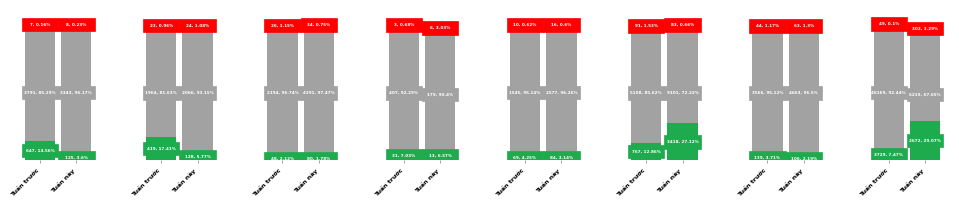

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

COLORS = {
    'Positive': '#1EAB4D',  
    'Neutral': '#A2A2A2',  
    'Negative': '#FF0000',
   
} 
FIGSIZE = (9.74, 2.18)
BAR_DISTANCE = 10
WIDTH_BAR = 2.5
WIDTH_RECT = 3

def generate_stacked_bar_chart(data):
    sentiments = data.columns[2:].tolist() 
    data['Total'] = data[sentiments].sum(axis=1) 
    topics = data['Topic'].unique()
    x_labels = data['Period'].tolist()  
    x_positions = []
    for i in range(len(topics)):
        base = i * BAR_DISTANCE
        x_positions.extend([base, base + 3])
    fig, ax = plt.subplots(figsize=FIGSIZE)
    bottom = np.zeros(len(x_positions))
    rect_distance = np.zeros(len(x_positions))
    for sentiment in sentiments:
        values = data[sentiment].astype(int).tolist() 
        sizes = np.round(data[sentiment]/data['Total']*100, 2).tolist() if sentiment in data.columns else np.zeros(len(df)).astype(int).tolist()
        ax.bar(x_positions, sizes, bottom=bottom, color=COLORS[sentiment], label=sentiment, width=WIDTH_BAR)
        for i, (x, val, size) in enumerate(zip(x_positions, values, sizes)):
            if val > 0:
                height_rect = 10                
                if size/2 > rect_distance[i]:
                    y = (size + rect_distance[i]) / 2
                    rect_distance[i] += size
                else:
                    y = rect_distance[i]
                    rect_distance[i] += min(size, height_rect)
                      
                rect = plt.Rectangle(
                    (x - WIDTH_RECT / 2, y - height_rect / 2),
                    WIDTH_RECT, height_rect,
                    color=COLORS[sentiment],                 
                    linewidth=0.5,
                    zorder=3
                )
                ax.add_patch(rect)
                labels = f'{val}, {size}%'
                ax.text(
                    x,  y ,
                    labels,
                    ha='center', va='center',
                    fontsize=3,
                    color='white',
                    fontweight='bold',
                    zorder=4
                )
                
                
        bottom += sizes
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.tick_params(axis='x', length=2, width=0.5, colors='gray')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, fontsize = 4.5, fontweight='bold', color='black', rotation=45, ha='right')
    ax.set_xlim(-2 , max(x_positions) + 2)
    ax.set_ylim(bottom=0)
    ax.yaxis.set_visible(False)

    plt.tight_layout()
    plt.savefig('../img/sentiment_stacked_bar_chart.png', dpi=1280, bbox_inches='tight')


if __name__ == "__main__":
    df = pd.read_excel('../data/sentiment.xlsx', sheet_name='Sheet1', nrows=25, usecols='A, E:I').dropna(how='all').dropna(how='all', axis=1).fillna(0)
    df.columns = ['Period', 'Topic', 'Positive', 'Neutral', 'Negative']
    generate_stacked_bar_chart(df)

In [126]:
import plotly.graph_objects as go

# Dữ liệu và màu sắc
labels = ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok',
          'negative_FB', 'neutral_FB', 'positive_FB',
          'negative_News', 'neutral_News', 'positive_News',
          'negative_Forum', 'neutral_Forum', 'positive_Forum',
          'negative_YT', 'neutral_YT', 'positive_YT',
          'negative_FP', 'neutral_FP', 'positive_FP',
          'negative_TT', 'neutral_TT', 'positive_TT']

parents = ['', '', '', '', '', '',
           'Facebook', 'Facebook', 'Facebook',
           'News', 'News', 'News',
           'Forum', 'Forum', 'Forum',
           'Youtube', 'Youtube', 'Youtube',
           'Fanpage', 'Fanpage', 'Fanpage',
           'Tiktok', 'Tiktok', 'Tiktok']

values = [50, 30, 20, 40, 25, 35,  # Tổng platform
          10, 20, 20,             # Facebook
          5, 15, 10,              # News
          4, 8, 8,                # Forum
          10, 15, 15,             # Youtube
          8, 10, 7,               # Fanpage
          12, 10, 13]             # Tiktok

# Màu platform
platform_colors = {
    'Facebook': 'rgb(0, 176, 240)',
    'News': 'rgb(223,140,150)',
    'Forum': 'rgb(76, 145, 90)',
    'Youtube': 'rgb(23, 115, 224)',
    'Fanpage': 'rgb(25, 165, 152)',
    'Tiktok': 'rgb(165, 156, 199)',  # Chỉnh lại đúng là rgb
}

# Màu sentiment
sentiment_colors = {
    'negative': 'rgb(192, 0, 0)',
    'positive': 'rgb(104, 191, 55)',
    'neutral': 'rgb(166, 166, 166)',
}

# Tạo màu cho từng node
colors = []
for label in labels:
    if label in platform_colors:
        colors.append(platform_colors[label])
    else:
        for sentiment in sentiment_colors:
            if sentiment in label:
                colors.append(sentiment_colors[sentiment])
                break
        else:
            colors.append('lightgrey')

# Vẽ biểu đồ
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    marker=dict(colors=colors),
    branchvalues="total",
    hovertemplate='<b>%{label}</b><br>Giá trị: %{value}<extra></extra>'
))

# Bổ sung phần tử annotation cho platform (bên trái) và sentiment (bên phải)
annotations = []

# Platform - bên trái
platform_labels = list(platform_colors.keys())
for i, label in enumerate(platform_labels):
    annotations.append(dict(
        x=-0.6, y=0.4 - i * 0.15,
        text=f"<b>{label}</b>",
        showarrow=False,
        font=dict(color=platform_colors[label], size=12),
        xanchor='left'
    ))

# Sentiment - bên phải
sentiment_labels = list(sentiment_colors.keys())
for i, label in enumerate(sentiment_labels):
    annotations.append(dict(
        x=0.6, y=0.4 - i * 0.15,
        text=f"<b>{label}</b>",
        showarrow=False,
        font=dict(color=sentiment_colors[label], size=12),
        xanchor='right'
    ))

# Tổng giá trị
total_value = sum(values[:6])
annotations.append(dict(
    x=0.7, y=-0.5,
    ax=0,
    ay=0,
    xref="paper", yref="paper",
    axref="paper", ayref="paper",
    text=f"<b>Tổng cộng: {total_value}</b>",
    showarrow=True,
    font=dict(size=13, color='black'),
    arrowhead=3
))

# Áp dụng layout
fig.update_layout(
    margin=dict(t=10, l=10, r=10, b=10),
    annotations=annotations,
    uniformtext=dict(minsize=10, mode='hide')
)

fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'axref' property of layout.annotation
        Received value: 'paper'

    The 'axref' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['pixel']
      - A string that matches one of the following regular expressions:
            ['^x([2-9]|[1-9][0-9]+)?( domain)?$']

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


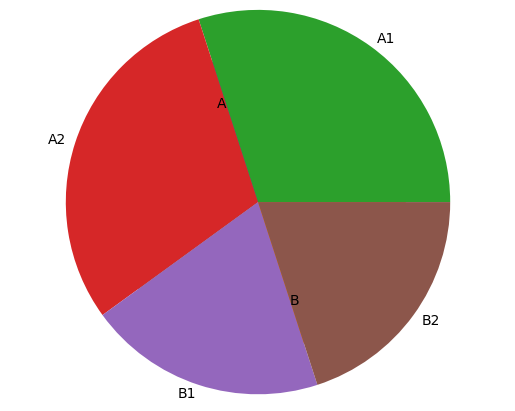

In [130]:
import matplotlib.pyplot as plt

# Dữ liệu cấp 1
sizes1 = [60, 40]
labels1 = ['A', 'B']

# Dữ liệu cấp 2 (con của A: A1, A2; con của B: B1, B2)
sizes2 = [30, 30, 20, 20]
labels2 = ['A1', 'A2', 'B1', 'B2']

fig, ax = plt.subplots()
ax.axis('equal')

# Cấp 1
inner = ax.pie(sizes1, radius=1, labels=labels1, labeldistance=0.7)

# Cấp 2
outer = ax.pie(sizes2, radius=1.3, labels=labels2, labeldistance=1.05)

plt.show()


In [72]:
df = pd.read_excel('doughnut.xlsx', sheet_name='Sheet1', nrows=8).dropna(how='all').fillna(0)
df

,Topic,This Week,Last Week
0,SHB,3476,4445
1,ACB Bank,2218,2406
2,MB Bank,4505,2268
3,MSB,198,441
4,Sacombank,2677,1624
5,Techcombank,12602,5966
6,Vietcombank,4832,3749
7,VPBank,9193,49947


In [113]:
data = {
    "SHB": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "Vietcombank": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "Techcombank": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "MB Bank": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "VPBank": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "MSB": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "Sacombank": [np.random.randint(50, 100, size=11) for _ in range(3)],
    "ACB Bank": [np.random.randint(50, 100, size=11) for _ in range(3)],
}
data["SHB"]

[array([88, 54, 68, 87, 50, 65, 59, 77, 90, 94, 61]),
 array([96, 84, 88, 76, 85, 60, 68, 53, 64, 69, 63]),
 array([86, 51, 67, 68, 80, 77, 51, 53, 82, 95, 53])]

In [2]:
import pandas as pd

data = {}
shb = pd.read_excel('../data/hbar-shb.xlsx').fillna(0)
shb.iloc[:, 1:] = shb.iloc[:, 1:]
data["SHB"] =  shb.iloc[:, 1:-1].values

vcb = pd.read_excel('../data/hbar-vcb.xlsx').fillna(0)
vcb.iloc[:, 1:] = vcb.iloc[:, 1:]
data["Vietcombank"] = vcb.iloc[:, 1:-1].values

tcb = pd.read_excel('../data/hbar-tcb.xlsx').fillna(0)
tcb.iloc[:, 1:] = tcb.iloc[:, 1:]
data["Techcombank"] = tcb.iloc[:, 1:-1].values

mb = pd.read_excel('../data/hbar-mb.xlsx').fillna(0)
mb.iloc[:, 1:] = mb.iloc[:, 1:]
data["MB Bank"] = mb.iloc[:, 1:-1].values

vp = pd.read_excel('../data/hbar-vp.xlsx').fillna(0)
vp.iloc[:, 1:] = vp.iloc[:, 1:]
data["VPBank"] = vp.iloc[:, 1:-1].values

msb = pd.read_excel('../data/hbar-msb.xlsx').fillna(0)
msb.iloc[:, 1:] = msb.iloc[:, 1:]
data["MSB"] = msb.iloc[:, 1:-1].values

scb = pd.read_excel('../data/hbar-scb.xlsx').fillna(0)
scb.iloc[:, 1:] = scb.iloc[:, 1:]
data["Sacombank"] = scb.iloc[:, 1:-1].values

acb = pd.read_excel('../data/hbar-acb.xlsx').fillna(0)
acb.iloc[:, 1:] = acb.iloc[:, 1:]
data["ACB Bank"] = acb.iloc[:, 1:-1].values

[-0.7  0.7  2.1  3.5  4.9  6.3  7.7  9.1 10.5 11.9 13.3]
[ 0.   1.4  2.8  4.2  5.6  7.   8.4  9.8 11.2 12.6 14. ]
Processing topic: SHB
Processing topic: Vietcombank
Processing topic: Techcombank
Processing topic: MB Bank
Processing topic: VPBank
Processing topic: MSB
Processing topic: Sacombank
Processing topic: ACB Bank


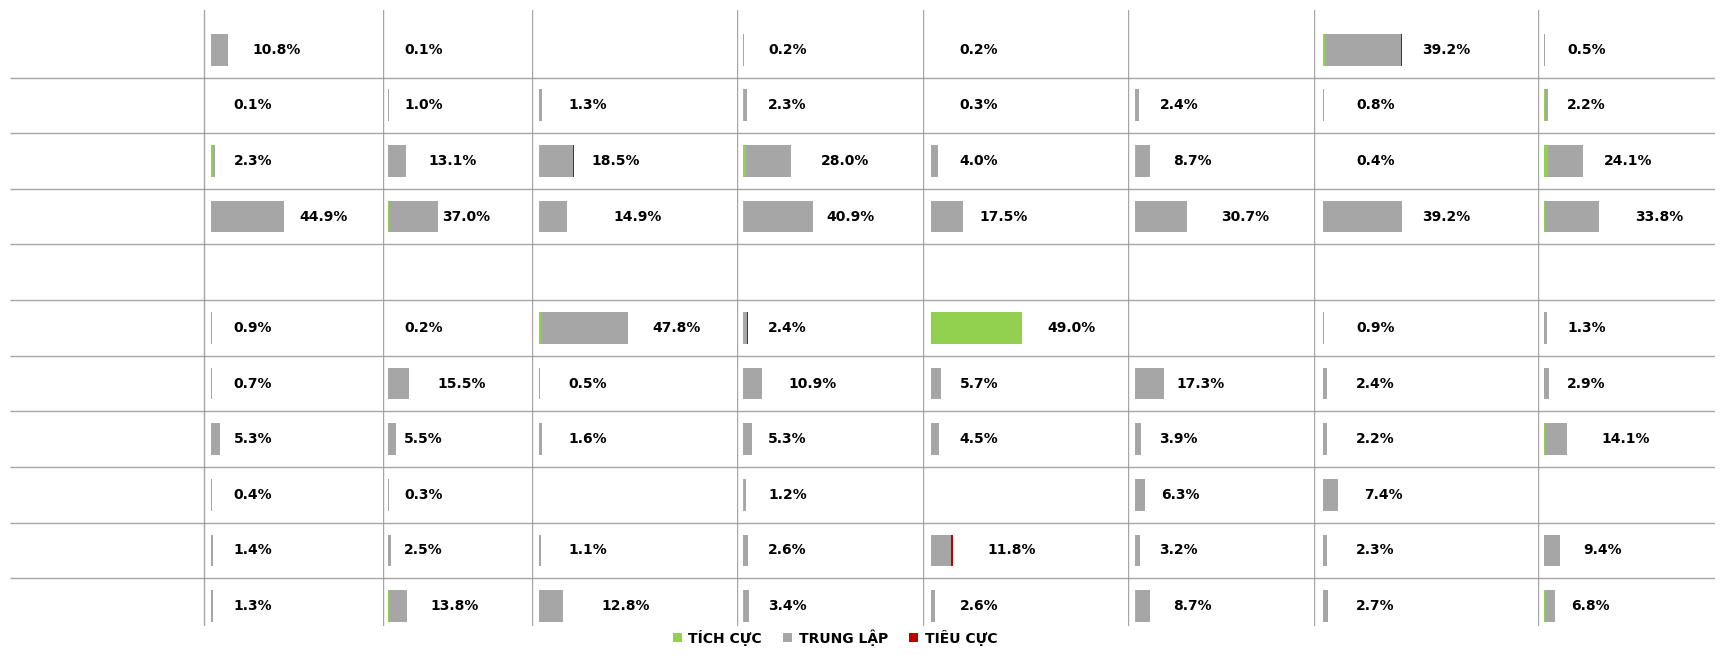

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch


conversations = ["BAN LÃNH ĐẠO", "CHI NHÁNH LIÊN DOANH", "CHIẾN DỊCH & SỰ KIỆN", "CHỨNG KHOÁN", "DỊCH VỤ KHÁCH HÀNG", "HOẠT ĐỘNG FANPAGE", 
          "NHÂN SỰ & TUYỂN DỤNG", "SẢN PHẨM DỊCH VỤ CÁ NHÂN", "SẢN PHẨM DỊCH VỤ DOANH NGHIỆP", "SẢN PHẨM THẺ", "THƯƠNG HIỆU CHUNG"]
topics = ["SHB", "Vietcombank",  "Techcombank", "MB Bank", "VPBank", "MSB", "Sacombank", "ACB Bank"]
sentiments = ["TÍCH CỰC", "TRUNG LẬP", "TIÊU CỰC"]


# Màu sắc cho các sentiment
colors = {
    "TÍCH CỰC": "#92D050",  # Màu xanh lá
    "TRUNG LẬP": "#A6A6A6",  # Màu xám
    "TIÊU CỰC": "#C00000"  # Màu đỏ
}
# Tạo figure với 2 axes xếp ngang
width_ratios=[2, 0.8, 1.1, 1, 1.1, 1, 1.2, 0.95]
def create_horizontal_bar_chart(data):
    n_rows, n_cols = len(conversations), len(topics)
    fig = plt.figure(figsize=(22, 8))
    first_ax_ratio = 2
    gs = GridSpec(1, 8, width_ratios= width_ratios, wspace=0)

    first_ax = fig.add_subplot(gs[0])
    axs = [first_ax]
    for i in range(1, n_cols):
        ax = fig.add_subplot(gs[i], sharey=first_ax)
        axs.append(ax)

    num_hlines = np.arange(n_rows)[1:]
    offset = -0.5
    max_value = 110
    y = np.arange(0, 1.4 * n_rows, 1.4)
    y_middle = y - 0.7
    print(y_middle)
    print(y)
    for i, (ax, topic) in enumerate(zip(axs, topics)):
        print(f"Processing topic: {topic}")
        for spine in ax.spines.values():
            spine.set_visible(False)
        
        xmin = -120 if i == 0 else 0
        ax.set_xlim(xmin, max_value)
        ax.set_ylim(-1.2, n_rows*1.3)
        ax.hlines(y=y[:-1], xmin=xmin, xmax=max_value, colors='gray', linestyles='-', linewidth=1, alpha=0.7, zorder=0)
        ax.vlines(x=0, ymin=-1.4, ymax=n_rows*1.4, colors='gray', linestyles='-', linewidth=1, alpha=0.7, zorder=1)
        ax.tick_params(axis='y', which='both', length=0)
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.tick_params(axis='x', which='both', length=0)

        bottom = np.full((n_rows,), 4.0)
        df = data[topic].T * 100
        for j, color in enumerate(colors.values()):
            values = np.round(df[j].tolist(), 1)
            ax.barh(y_middle, values, left=bottom, color=color, height=0.8, zorder=10)
            # Add text labels above each bar segment

            bottom += values
        for k, bottom in enumerate(bottom):
            if bottom > 40:
                x_pos = bottom * 1.5
            elif bottom > 20:
                x_pos = bottom * 2
            elif bottom > 10:
                x_pos = bottom * 3
            else:
                x_pos = 30
            y_pos = y_middle[k]
            if bottom - 4 > 0:
                ax.text(x_pos, y_pos, f'{round(bottom - 4, 2)}%', ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold', zorder=20)
        # Existing text for total sum


    legend_elements = [Patch(facecolor=colors[sentiment], label=sentiment) for sentiment in sentiments]

    # Create the legend
    fig.legend(
        handles=legend_elements,
        labels=sentiments,
        loc='lower center',
        bbox_to_anchor=(0.5, 0.07),
        ncol=len(sentiments),

        prop={'weight': 'bold', 'size': 10},  
        frameon=False,
        handlelength=0.65,
        handletextpad=0.5,
        columnspacing=1.5
    )

    plt.savefig('../img/horizontal_bar.png', dpi=300, bbox_inches='tight')
if __name__ == "__main__":
    create_horizontal_bar_chart(data)
    plt.show()
# plt.show()

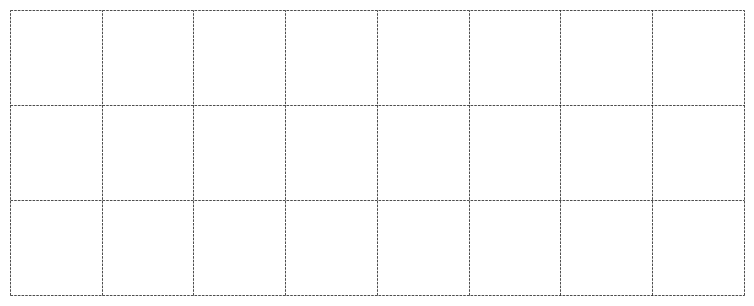

In [123]:
import matplotlib.pyplot as plt

# Kích thước hình
fig_width = 9.48
fig_height = 3.72

# Số hàng và cột
n_rows, n_cols = 3, 8

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.axis("off")
ax.set_xlim(0,1.001)
ax.set_ylim(-0.002,1)

for i in range(n_rows + 1):
    y = i / n_rows
    ax.hlines(y=y, xmin=0, xmax=1, colors='black', linestyles='--', linewidth=0.5)

for j in range(n_cols + 1):
    x = j / n_cols
    ax.vlines(x=x, ymin=0, ymax=1, colors='black', linestyles='--', linewidth=0.5)

plt.savefig('../img/grid_with_dashed_lines.png', dpi=300, bbox_inches='tight', pad_inches=0)


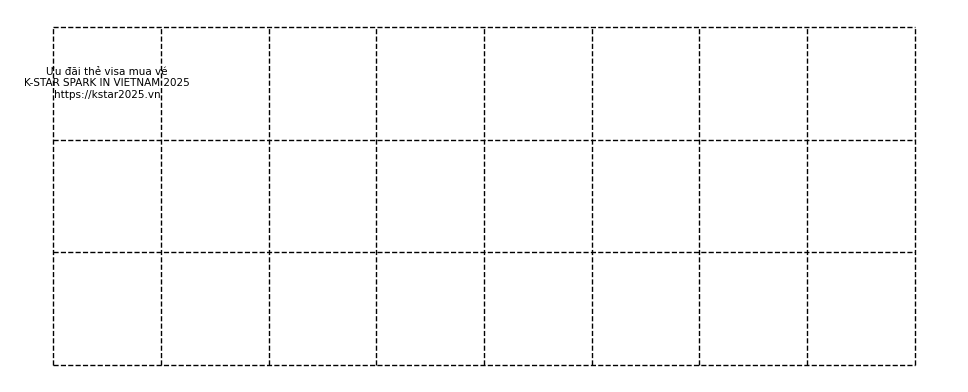

In [86]:
import matplotlib.pyplot as plt

fig_width = 9.48
fig_height = 3.72
n_rows, n_cols = 3, 8

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.axis("off")

# Vẽ lưới bảng bằng đường gạch đứt
for i in range(n_rows + 1):
    y = i / n_rows
    ax.hlines(y=y, xmin=0, xmax=1, colors='black', linestyles='--', linewidth=1)

for j in range(n_cols + 1):
    x = j / n_cols
    ax.vlines(x=x, ymin=0, ymax=1, colors='black', linestyles='--', linewidth=1)

# Thêm text có URL vào ô hàng 0, cột 0
row, col = 0, 0
x = (col + 0.5) / n_cols
y = 1 - (row + 0.5) / n_rows

# Nội dung text có URL
text = "Ưu đãi thẻ visa mua vé\nK-STAR SPARK IN VIETNAM 2025\nhttps://kstar2025.vn"

ax.text(x, y, text, ha='center', va='center', fontsize=7.5, wrap=True)

# Bỏ khoảng trắng xung quanh
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()


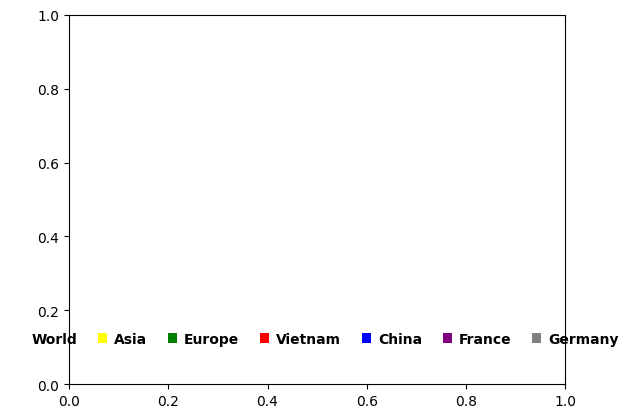

In [13]:
import plotly.express as px
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

# Dữ liệu phân cấp
data = pd.DataFrame({
    'labels': ['World', 'Asia', 'Europe', 'Vietnam', 'China', 'France', 'Germany'],
    'parents': ['', 'World', 'World', 'Asia', 'Asia', 'Europe', 'Europe'],
    'values': [0, 0, 0, 10, 40, 20, 30]  # Các giá trị bên trong
})

labels =  ['World', 'Asia', 'Europe', 'Vietnam', 'China', 'France', 'Germany']
# Màu sắc theo nhãn
color_map = {
    'World': 'white',
    'Asia': 'yellow',
    'Europe': 'green',
    'Vietnam': 'red',
    'China': 'blue',
    'France': 'purple',
    'Germany': 'gray'
}

# Vẽ biểu đồ sunburst
fig = px.sunburst(
    data,
    names='labels',
    parents='parents',
    values='values',
    color='labels',
    color_discrete_map=color_map,
    title='Biểu đồ Sunburst phân cấp với chú thích bên ngoài'
)

legend_elements = [Patch(facecolor=color_map[label], label=label) for label in labels]

    # Create the legend
   
    
plt.legend(
        handles=legend_elements,
        labels=labels,
        loc='lower center',
        bbox_to_anchor=(0.5, 0.07),
        ncol=len(labels),

        prop={'weight': 'bold', 'size': 10},  
        frameon=False,
        handlelength=0.65,
        handletextpad=0.5,
        columnspacing=1.5
    )
fig.update_traces(insidetextorientation='radial')

# Hiển thị
fig.show()


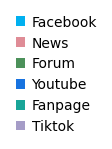

In [21]:
# Tạo legend bằng matplotlib và lưu ảnh
fig_legend, ax = plt.subplots(figsize=(1, 1))
ax.axis('off')
labels = ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok']
color_map ={
  "Facebook": "#00B0F0",
  "News": "#DF8C96",
  "Forum": "#4C915A",
  "Youtube": "#1773E0",
  "Fanpage": "#19A598",
  "Tiktok": "#A59CC7"
}

legend_elements = [Patch(facecolor=color_map[label], label=label) for label in labels]
ax.legend(
    handles=legend_elements,
    loc='center',
    ncol=1,
    frameon=False,handlelength=0.65, handletextpad=0.5

)
plt.tight_layout()
plt.savefig("legend.png", bbox_inches='tight')

# Sau đó hiển thị Plotly
import plotly.express as px
fig = px.sunburst(
    data,
    names='labels',
    parents='parents',
    values='values',
    color='labels',
    color_discrete_map=color_map,
    title='Biểu đồ Sunburst'
)
fig.show()


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu phân cấp
data = pd.DataFrame({
    'labels': ['World', 'Asia', 'Europe', 'Vietnam', 'China', 'France', 'Germany'],
    'parents': ['', 'World', 'World', 'Asia', 'Asia', 'Europe', 'Europe'],
    'values': [0, 0, 0, 10, 40, 20, 30]
})

# Ánh xạ màu
color_map = {
    'World': 'white',
    'Asia': 'yellow',
    'Europe': 'green',
    'Vietnam': 'red',
    'China': 'blue',
    'France': 'purple',
    'Germany': 'gray'
}

# Tạo biểu đồ sunburst
fig = px.sunburst(
    data,
    names='labels',
    parents='parents',
    values='values',
    color='labels',
    color_discrete_map=color_map,
    title='Biểu đồ Sunburst với màu chú thích'
)

# Hàm hỗ trợ tạo span màu
def color_box(label, color):
    return f"""
    <span style="display:inline-block;width:12px;height:12px;
                 background-color:{color};margin-right:6px;
                 border:1px solid #888;"></span>{label}
    """


# Tạo chú thích dạng HTML
left_legend = "<b>Legend:</b><br>" + "<br>".join([
    color_box("World", "white"),
    color_box("Asia", "yellow"),
    color_box("Europe", "green")
])

right_legend = "<br>".join([
    color_box("Vietnam", "red"),
    color_box("China", "blue"),
    color_box("France", "purple"),
    color_box("Germany", "gray")
])

# Thêm chú thích 2 bên
fig.update_layout(
    annotations=[
        dict(
            x=0, y=0.7,
            text=left_legend,
            showarrow=False,
            align='left',
            font=dict(size=12),
            xanchor='left',
            yanchor='top'
        ),
        dict(
            x=1, y=0.7,
            text=right_legend,
            showarrow=False,
            align='right',
            font=dict(size=12),
            xanchor='right',
            yanchor='top'
        )
    ],
    margin=dict(t=60, l=50, r=50, b=50)
)

# Cấu hình nhãn bên trong
fig.update_traces(insidetextorientation='radial')

# Hiển thị
fig.show()


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

COLORS = {
    'Positive': '#1EAB4D',  
    'Neutral': '#A6A6A6',  
    'Negative': '#C00000',
   
}
FIGSIZE = (9.74, 2.18)
BAR_DISTANCE = 6
WIDTH_BAR = 0.7

HEIGHT_RECT = 10

def generate_stacked_bar_chart(data):
    sentiments = data.columns[2:].tolist() 
    data['Total'] = data[sentiments].sum(axis=1) 
    topics = data['Topic'].unique()
    x_labels = data['Period'].tolist()  
    x_positions = []
    for i in range(len(topics)):
        base = i * 3
        x_positions.extend([base, base + 1])
    fig, ax = plt.subplots(figsize=FIGSIZE)
    bottom = np.zeros(len(x_positions))
    rect_distance = np.zeros(len(x_positions))
    y_positions = np.zeros(len(x_positions))
    for sentiment in sentiments:
        values = data[sentiment].astype(int).tolist()
        sizes = np.round(data[sentiment] / data['Total'] * 100, 1).tolist() \
            if sentiment in data.columns else np.zeros(len(df)).astype(int).tolist()

        ax.bar(x_positions, sizes, bottom=bottom, color=COLORS[sentiment], label=sentiment, width=WIDTH_BAR)

        for i, (x, val, size) in enumerate(zip(x_positions, values, sizes)):
            if size < HEIGHT_RECT:
                if bottom[i] == 0:
                    y_positions[i] = HEIGHT_RECT / 2
                    rect_distance[i] += HEIGHT_RECT + size / 2
                elif bottom[i] < rect_distance[i]:
                    y_positions[i] = rect_distance[i] + HEIGHT_RECT / 2
                    rect_distance[i] += HEIGHT_RECT + size / 2
                else:
                    y_positions[i] = rect_distance[i] + size / 2
                    rect_distance[i] += HEIGHT_RECT / 2 + size / 2
            else:
                if size / 2 >= rect_distance[i]:
                    y_positions[i] = bottom[i] + size / 2
                    rect_distance[i] = bottom[i] + size

        adjusted_rect_distace = rect_distance.copy()
        for i in range(0, len(x_positions), 2):
            left_size = sizes[i]
            right_size = sizes[i + 1]
            offset = 12
            if left_size > right_size:
                
                y_positions[i] = y_positions[i + 1] + offset
                adjusted_rect_distace[i] = rect_distance[i + 1] + offset if rect_distance[i] / 2 < offset else rect_distance[i]
            elif right_size > left_size:
                
                y_positions[i + 1] = y_positions[i] + offset
                adjusted_rect_distace[i + 1] = rect_distance[i] + offset if rect_distance[i + 1] / 2 < offset else rect_distance[i + 1]
        print(f"Adjusted rect_distance: {adjusted_rect_distace}")
        print(f"Y positions: {y_positions}")
        print(f"Sizes of bars: {sizes}")
        
        for i in range(len(x_positions)):
            if values[i] < 100:
                width_rect = WIDTH_BAR * 1.3
            elif values[i] < 1000:
                width_rect = WIDTH_BAR * 1.5
            else:
                width_rect = WIDTH_BAR * 2
                
            print(f"Position {i}: x={x_positions[i]}, y={y_positions[i]}, value={values[i]}, size={sizes[i]}, rect_distance={rect_distance[i]}")
            rect = plt.Rectangle(
                (x_positions[i] - width_rect / 2, y_positions[i] - HEIGHT_RECT / 2),
                width_rect, HEIGHT_RECT,
                facecolor=COLORS[sentiment],
                linewidth=0.5,
                zorder=3
            )
            ax.add_patch(rect)
            label = f'{values[i]}, {sizes[i]}%'

            ax.text(
                x_positions[i], y_positions[i],
                label,
                ha='center', va='center',
                fontsize=4.5, color='white', fontweight='bold',
                zorder=4
            )
        bottom += sizes

    
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.tick_params(axis='x', length=0, width=0)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, fontsize = 4.5, fontweight='bold', color='black', rotation=45, ha='right')
    ax.set_xlim(-0.8 , max(x_positions) + 0.8)
    ax.set_ylim(bottom=0)
    ax.yaxis.set_visible(False)

    plt.tight_layout()
    plt.savefig('./img/sentiment_stacked_bar_chart.png', dpi=1280, bbox_inches='tight')


if __name__ == "__main__":
    df = pd.read_excel('./data/sentiment.xlsx', sheet_name='Sheet1', nrows=25, usecols='A, E:I').dropna(how='all').dropna(how='all', axis=1).fillna(0)
    df.columns = ['Period', 'Topic', 'Positive', 'Neutral', 'Negative']
    generate_stacked_bar_chart(df)

FileNotFoundError: [Errno 2] No such file or directory: './data/sentiment.xlsx'

In [3]:
data = pd.read_excel('../data/slide6.xlsx', sheet_name='Sheet1').dropna(how='all').dropna(how='all', axis=1).fillna(0)

In [4]:
data.columns = ['Topic', 'Positive', 'Neutral', 'Negative', 'Total']
data = data.iloc[:, :-1]

In [5]:
data

,Topic,Positive,Neutral,Negative
0,CHỨNG KHOÁN,0.0023,0.3157,0.0000
1,BAN LÃNH ĐẠO,0.0023,0.0970,0.0023
2,SẢN PHẨM/ DỊCH VỤ CÁ NHÂN,0.0026,0.0498,0.0000
3,CHIẾN DỊCH & SỰ KIỆN,0.0124,0.0112,0.0000
4,THẺ,0.0014,0.0132,0.0000
5,THƯƠNG HIỆU CHUNG,0.0017,0.0101,0.0000


[0, 2, 4, 6, 8, 10]
Position 0: x=0, y=0.0, value=0.23, size=0.23, rect_distance=0.0, bottom=0.0
Position 1: x=2, y=0.0, value=0.23, size=0.23, rect_distance=0.0, bottom=0.0
Position 2: x=4, y=0.0, value=0.26, size=0.26, rect_distance=0.0, bottom=0.0
Position 3: x=6, y=0.0, value=1.24, size=1.24, rect_distance=0.0, bottom=0.0
Position 4: x=8, y=0.0, value=0.14, size=0.14, rect_distance=0.0, bottom=0.0
Position 5: x=10, y=0.0, value=0.17, size=0.17, rect_distance=0.0, bottom=0.0
Position 0: x=0, y=2.4, value=31.57, size=31.57, rect_distance=4.8, bottom=0.23
Position 1: x=2, y=2.4, value=9.7, size=9.7, rect_distance=4.8, bottom=0.23
Position 2: x=4, y=2.4, value=4.98, size=4.98, rect_distance=4.8, bottom=0.26
Position 3: x=6, y=2.4, value=1.12, size=1.12, rect_distance=4.8, bottom=1.24
Position 4: x=8, y=2.4, value=1.32, size=1.32, rect_distance=4.8, bottom=0.14
Position 5: x=10, y=2.4, value=1.01, size=1.01, rect_distance=4.8, bottom=0.17
Position 0: x=0, y=16.015, value=0.0, size=0.0, 

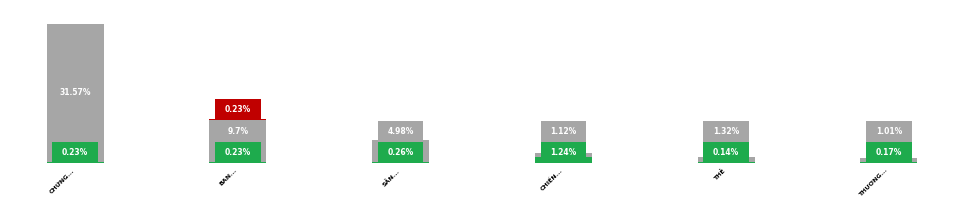

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

COLORS = {
'Positive': '#1EAB4D',  
'Neutral': '#A6A6A6',  
'Negative': '#C00000',

}
FIGSIZE = (9.74, 2.18)
BAR_DISTANCE = 6
WIDTH_BAR = 0.7

HEIGHT_RECT = 4.8

sentiments = data.columns[1:].tolist() 
topics = data['Topic'].unique()
x_labels = topics.tolist()
x_positions = []
for i in range(len(topics)):
    base = i * 2
    x_positions.extend([base])
print(x_positions)
fig, ax = plt.subplots(figsize=FIGSIZE)
bottom = np.zeros(len(x_positions))
rect_distance = np.zeros(len(x_positions))
y_positions = np.zeros(len(x_positions))
for sentiment in sentiments:
    sizes = np.round(data[sentiment] * 100, 2).tolist() \
        if sentiment in data.columns else np.zeros(len(df)).astype(int).tolist()

    ax.bar(x_positions, sizes, bottom=bottom, color=COLORS[sentiment], label=sentiment, width=WIDTH_BAR)
    
    for i, (x, size) in enumerate(zip(x_positions, sizes)):
        print(f"Position {i}: x={x_positions[i]}, y={y_positions[i]}, value={sizes[i]}, size={sizes[i]}, rect_distance={rect_distance[i]}, bottom={bottom[i]}")
        if size < HEIGHT_RECT:
            if bottom[i] == 0:
                y_positions[i] = HEIGHT_RECT / 2
                rect_distance[i] += HEIGHT_RECT
            else:
                y_positions[i] = rect_distance[i] + HEIGHT_RECT / 2
                rect_distance[i] += HEIGHT_RECT
        else:
            if size / 2 >= rect_distance[i] + HEIGHT_RECT / 2:
                y_positions[i] = bottom[i] + size / 2
                rect_distance[i] = bottom[i] + size
            else:
                y_positions[i] = rect_distance[i] + HEIGHT_RECT / 2
                rect_distance[i] += HEIGHT_RECT
    
    for i in range(len(x_positions)):
        if sizes[i] > 0:
            if sizes[i] < 100:
                width_rect = WIDTH_BAR * 0.8
            elif sizes[i] < 1000:
                width_rect = WIDTH_BAR * 1.5
            else:
                width_rect = WIDTH_BAR * 2
                
            
            rect = plt.Rectangle(
                (x_positions[i] - width_rect / 2, y_positions[i] - HEIGHT_RECT / 2),
                width_rect, HEIGHT_RECT,
                facecolor=COLORS[sentiment],
                linewidth=0.5,
                zorder=3
            )
            ax.add_patch(rect)
            label = f'{sizes[i]}%'

            ax.text(
                x_positions[i], y_positions[i],
                label,
                ha='center', va='center',
                fontsize=5.5, color='white', fontweight='bold',
                zorder=4
            )
    bottom += sizes


for spine in ax.spines.values():
    spine.set_visible(False)
ax.axhline(0, color='gray', linewidth=0.5)
ax.tick_params(axis='x', length=0, width=0)
ax.set_xticks(x_positions)
x_labels = [f"{x_label.split(" ")[0]}..."  if len(x_label) > 10 else x_label for x_label in x_labels]  # Giới hạn độ dài nhãn
ax.set_xticklabels(x_labels, fontsize = 4.5, fontweight='bold', color='black', rotation=45, ha='right')
ax.set_xlim(-0.8 , max(x_positions) + 0.8)
ax.set_ylim(0, 35)
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig('../img/test.png', dpi=1280, bbox_inches='tight')




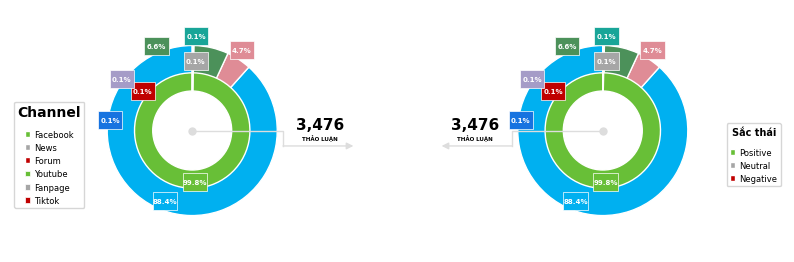

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

RECT_WIDTH = 0.4
RECT_HEIGHT = 0.3
TOTAL_POSITION = (0, 0.1)
BELOW_TEXT_POSITION = (0, -0.15)
COMPARE_TEXT_POSITION = (0, -0.4)

# Màu sắc cho sentiment


def draw_doughnut(ax, radius, values, labels, colors, total_compare, label_title, xtitle, ytitle, ha, width=0.35):
   
    percentages = np.round(values / values.sum() * 100, 1)
    color_values = [colors[label] for label in labels]

# Vòng trong nhỏ hơn (chính)
    wedges, _ = ax.pie(
        percentages,
        labels=None,
        radius=radius,
        startangle=90,
        colors=color_values,
        wedgeprops=dict(width=width, edgecolor='white')
    )


    angle_rad = np.zeros(len(wedges))
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2
        angle_rad[i] = np.radians(angle)


    i = 0
    shift_count = 0
    max_shifts = 10
    rotation_step_deg = 10
    THRESHOLD_DISTANCE = 1 * radius
    based_radius = radius * 0.9

    while i < len(wedges):
        left_x, left_y = radius*np.cos(angle_rad[i]), radius*np.sin(angle_rad[i])
        # print(angle_rad)
        j = (i + 1) % len(wedges)
        right_x, right_y = radius*np.cos(angle_rad[j]), radius*np.sin(angle_rad[j])
        distance = np.sqrt((left_x - right_x)**2 + (left_y - right_y)**2)
        # print(f"Distance between color {color_values[i]} and {color_values[j]}: {distance:.2f}")
        if distance >= THRESHOLD_DISTANCE or shift_count >= max_shifts:
            i += 1
            shift_count = 0
        else:
            angle_rad[j] += np.radians(rotation_step_deg)
            shift_count += 1

    for i in range(len(wedges)):
        x, y = radius*np.cos(angle_rad[i]), radius*np.sin(angle_rad[i])     
        rect = plt.Rectangle((x - 0.15 , y ), RECT_WIDTH, RECT_HEIGHT, color=color_values[i], ec='white', linewidth=0.5, zorder=3)
        ax.add_patch(rect)
        ax.text(x - 0.15 + RECT_WIDTH / 2, y + RECT_HEIGHT / 2, f'{percentages[i]}%', ha='center', va='center', fontsize=5, color='white', fontweight='bold', zorder=4)

    total_value = values.sum()
    compare_value = total_value - total_compare
    percent_diff = np.round((compare_value / total_compare) * 100, 0) if total_compare != 0 else 0

    compare_text = f"{percent_diff}%" if percent_diff < 0 else f"+{percent_diff}%"
    compare_color = '#ff0000' if percent_diff < 0 else '#1EAB4D'

    # ax.text(xtitle, ytitle, label_title, ha=ha, va='bottom', fontsize=8, fontweight='bold', color='#00AEEF')
    # ax.text(TOTAL_POSITION[0], TOTAL_POSITION[1], f"{total_value:,.0f}", ha='center', va='center', fontsize=16, fontweight='bold', color='#00AEEF')
    # ax.text(BELOW_TEXT_POSITION[0], BELOW_TEXT_POSITION[1], "THẢO LUẬN", ha='center', va='center', fontsize=8, fontweight='bold', color='#00AEEF')
    # ax.text(COMPARE_TEXT_POSITION[0], COMPARE_TEXT_POSITION[1], compare_text, ha='center', va='center', fontsize=10, fontweight='bold', color=compare_color)


fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10, 5))
# fig.subplots_adjust(wspace=0.05)

# Tạo dữ liệu mẫu phù hợp
data = {
    'sentiment': ['Positive', 'Neutral', 'Negative'],
    'value': [93.6, 0.1, 0.1]
}
labels = ['Positive', 'Neutral', 'Negative']
colors = {
'Positive': '#68BF37',
'Neutral': '#A6A6A6',
'Negative': '#C00000'
}
data2 = {
    'sentiment': ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok'],
    'value': [93.6, 5, 7, 0.1, 0.1, 0.1]
}
labels2 = ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok']
colors2 = {
    'Facebook': '#00B0F0',
    'News': '#DF8C96',
    'Forum': '#4C915A',
    'Youtube': '#1773E0',
    'Fanpage': '#19A598',
    'Tiktok': '#A59CC7'
}

df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

draw_doughnut(
    ax,
    1,
    df['value'],
    labels,
    colors,
    total_compare=df['value'].sum(),
    label_title="Tuần này",
    xtitle=0,
    ytitle=-2,
    ha='left'
)
draw_doughnut(
    ax,
    1.4,
    df2['value'],
    labels2,
    colors2,
    total_compare=df2['value'].sum(),
    label_title="Tuần này",
    xtitle=0,
    ytitle=-1.25,
    ha='left',
    width=0.45
)

legend = ax.legend(
    title="Channel",
    labels=df2['sentiment'],
    loc='center left',
    bbox_to_anchor=(0, 0.4),
    ncol=1,
    fontsize=6,
    handlelength=0.65, handletextpad=0.5
)

legend.get_title().set_fontweight('bold')

# Tăng khoảng cách giữa title và các nhãn
legend._legend_box.sep = 8  # Đơn vị là điểm (pt), mặc định là 5

x = [0, 1.5, 1.5]
y = [0, 0, -0.254]

ax.plot(0, 0, 'o', color='#DDDDDD', markersize=5)

ax.plot(x, y, color='#DDDDDD', linewidth=1)

ax.annotate('', xy=(2.7, -0.254), xytext=(1.45, -0.254),
            arrowprops=dict(arrowstyle='-|>', color='#DDDDDD', lw=1))
ax.text(2.1, 0.1, '3,476', ha='center', va='center', fontsize=11, color='black', fontweight='bold')
ax.text(2.1, -0.12, 'THẢO LUẬN', ha='center', va='center', fontsize=4, color='black', fontweight='bold')

ax.set_xlim(-3, 2.8)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  


data = {
    'sentiment': ['Positive', 'Neutral', 'Negative'],
    'value': [93.6, 0.1, 0.1]
}
labels = ['Positive', 'Neutral', 'Negative']
colors = {
'Positive': '#68BF37',
'Neutral': '#A6A6A6',
'Negative': '#C00000'
}
data2 = {
    'sentiment': ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok'],
    'value': [93.6, 5, 7, 0.1, 0.1, 0.1]
}
labels2 = ['Facebook', 'News', 'Forum', 'Youtube', 'Fanpage', 'Tiktok']
colors2 = {
    'Facebook': '#00B0F0',
    'News': '#DF8C96',
    'Forum': '#4C915A',
    'Youtube': '#1773E0',
    'Fanpage': '#19A598',
    'Tiktok': '#A59CC7'
}

df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

draw_doughnut(
    ax1,
    1,
    df['value'],
    labels,
    colors,
    total_compare=df['value'].sum(),
    label_title="Tuần này",
    xtitle=0,
    ytitle=-2,
    ha='left'
)
draw_doughnut(
    ax1,
    1.4,
    df2['value'],
    labels2,
    colors2,
    total_compare=df2['value'].sum(),
    label_title="Tuần này",
    xtitle=0,
    ytitle=-1.25,
    ha='left',
    width=0.45
)
legend = ax1.legend(
    title='Sắc thái',
    labels=df['sentiment'],
    loc='right',
    bbox_to_anchor=(1, 0.4),
    ncol=1,
    fontsize=6,
    frameon=True,
    handlelength=0.65,
    handletextpad=0.5,
    title_fontsize=7  # hoặc dùng fontsize='large'
)

# Đặt title in đậm
legend.get_title().set_fontweight('bold')

# Tăng khoảng cách giữa title và các nhãn
legend._legend_box.sep = 8  # Đơn vị là điểm (pt), mặc định là 5


x = [0, -1.5, -1.5]
y = [0, 0, -0.254]

ax1.plot(0, 0, 'o', color='#DDDDDD', markersize=5)

ax1.plot(x, y, color='#DDDDDD', linewidth=1)

ax1.annotate('', xy=(-2.7, -0.254), xytext=(-1.45, -0.254),
            arrowprops=dict(arrowstyle='-|>', color='#DDDDDD', lw=1))
ax1.text(-2.1, 0.1, '3,476', ha='center', va='center', fontsize=11, color='black', fontweight='bold')
ax1.text(-2.1, -0.12, 'THẢO LUẬN', ha='center', va='center', fontsize=4, color='black', fontweight='bold')

ax1.set_xlim(-2.8, 3)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
ax1.axis('off')  

plt.savefig('../img/doughnut_chart.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()




In [5]:
import cv2
import numpy as np

def trim_white_border(image_path, output_path, threshold=240):
    # Đọc hình ảnh
    img = cv2.imread(image_path)
    
    # Chuyển sang ảnh grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tạo mask để tìm các vùng không phải viền trắng
    # Các pixel có giá trị lớn hơn threshold được coi là "trắng"
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    
    # Tìm các đường viền (contours)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Lấy contour lớn nhất (vùng nội dung chính của ảnh)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Tìm bounding box của contour
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Cắt ảnh theo bounding box
        cropped_img = img[y:y+h, x:x+w]
        
        # Lưu ảnh đã cắt
        cv2.imwrite(output_path, cropped_img)
        print(f"Ảnh đã được cắt và lưu tại: {output_path}")
    else:
        print("Không tìm thấy vùng nội dung để cắt!")

# Sử dụng hàm
image_path = "./extracted_images/SHB.jpg"  # Thay bằng đường dẫn đến ảnh của bạn
output_path = "output_image.jpg"  # Đường dẫn để lưu ảnh kết quả
trim_white_border(image_path, output_path)

Ảnh đã được cắt và lưu tại: output_image.jpg


In [3]:
from pptx import Presentation
import os

prs = Presentation("abc.pptx")

img_count = 0
output_dir = "extracted_images"
os.makedirs(output_dir, exist_ok=True)

for i, slide in enumerate(prs.slides):
    for shape in slide.shapes:
        if shape.shape_type == 13:  # PICTURE
            image = shape.image
            ext = image.ext
            img_bytes = image.blob
            filename = f"slide_{i+1}_img_{img_count+1}.{ext}"
            with open(os.path.join(output_dir, filename), 'wb') as f:
                f.write(img_bytes)
            img_count += 1

print(f"✅ Đã trích xuất {img_count} ảnh vào thư mục {output_dir}")


✅ Đã trích xuất 25 ảnh vào thư mục extracted_images


In [4]:
def extract_images_from_shape(shape, output_dir, slide_index, img_index):
    if shape.shape_type == 13:  # Picture
        image = shape.image
        ext = image.ext
        img_bytes = image.blob
        filename = f"slide_{slide_index}_img_{img_index}.{ext}"
        with open(os.path.join(output_dir, filename), "wb") as f:
            f.write(img_bytes)
        return 1
    elif shape.shape_type == 6:  # Group shape
        count = 0
        for subshape in shape.shapes:
            count += extract_images_from_shape(subshape, output_dir, slide_index, img_index + count)
        return count
    return 0
img_count = 0
for i, slide in enumerate(prs.slides):
    for shape in slide.shapes:
        img_count += extract_images_from_shape(shape, output_dir, i + 1, img_count + 1)
